# Unit 3 Capstone
Bryan Corder<br>
Mentor: Hoa Tran

## Introduction

For those in sales, one of the ways data science can provide actionable insights is through isolating reasons for customer churn. IBM has a data set on customer churn in the telecoms industry that prospective customers of IBM can use to see the power of their deep learning software Watson. The problem with these unsupervised learning methods is that while they provide good accuracy on predicting whether a customer will leave or not, they do not provide much insight in regards to the reasons why customers stay or go. Supervised Learning methods have the ability to provide such insights with their labelled data and through feature selection. The below project aims to gather insights in the IBM churn data set through feature selection and testing these features through various supervised learning models. 

## Data Set

The IBM data contains the following features: <br>
Customer ID = The key for the data. <br>
Gender = Male or Female (Categorical, binary)<br>
Senior Citizen = 0 (No) or 1 (Yes) (Categorical, binary)<br>
Dependents = No or Yes (Categorical, binary)<br>
Tenure = How long they have been a customer (Numerical, discrete)<br>
Phone Service = No or Yes (Categorical, binary)<br>
Multiple Lines = No, Yes, or 'No Phone Service' (Categorical)<br>
Internet Service = DSL, Fiber Optic, or No (Categorical)<br>
Online Security = No internet service, No, or Yes (Categorical)<br>
Online Backup = No internet service, No, or Yes (Categorical)<br>
Device Protection = No internet service, No, or Yes (Categorical) <br>
Tech Support = No internet service, No, or Yes (Categorical) <br>
Streaming TV = No internet service, No, or Yes (Categorical)<br> 
Streaming Movies = No internet service, No, or Yes (Categorical)<br>
Contract = Month-to-month, One year, or Two year (Categorical)<br>
Paperless Billing = No or Yes (Categorical, binary)<br>
PaymentMethod = Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic) (Categorical)<br>
Monthly Charges = How much the customer pays per month (Numerical, continuous)<br>
Total Charges = How much the customer pays annually (Numerical, continuous)<br>
Churn = Whether the customer stayed (= 0) or left (= 1) (Categorical, binary)<br>


## Data Import and Cleaning

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from datetime import datetime
%matplotlib inline

First, let's import our customer churn data set and take a look at how it imports.

In [164]:
main_start = datetime.now()
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

raw_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [165]:
# Let's take a look at the type of data in each column
# Drop the CustomerID since it's a unique key that means nothing to us.
data = raw_data.drop(['customerID'], axis=1)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [166]:
#It appears that Total Charges is coming in as a string, so let's make it numeric
data['TotalCharges'] = data['TotalCharges'].convert_objects(convert_numeric=True)

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [167]:
# Let's check the data for nulls
null_count = data.isnull().sum()
null_count[null_count>0]

TotalCharges    11
dtype: int64

In [168]:
# There appears to be 11 rows that are missing Total Charges. Since the number is insignificant, let's drop the rows.
data = data.dropna(axis=0)


In [169]:
#Get the values from our columns that are listed as strings
column_names = list(data.columns.values)

#Remove the int/float categories
del column_names[1]
del column_names[3]
del column_names[15]
del column_names[15]

for columns in column_names:
    print(columns,'\n', raw_data[columns].value_counts(), '\n')

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport 
 No                     3473
Yes                    20

In [170]:
#For the columns that only have 2 values yes or no, let's convert them to 0s and 1s
#Hold off on converting Churn to 0s and 1s for graphs below
Yes_No_Columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for feature in Yes_No_Columns:
    data[feature] = np.where(data[feature].values == 'Yes', 1, 0)

#Now let's convert the Males/Females in 0 (Males) and 1 (Females)
data['gender'] = np.where(data.gender.values == 'Female', 1, 0)

#Let's see what we've created
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes
5,1,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,Yes
6,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,No
7,1,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,No
8,1,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,Yes
9,0,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,No


The Dataframe looks nice, but it's hard to gather any insights from the data. Let's use count plots to see if we can pick up insights.

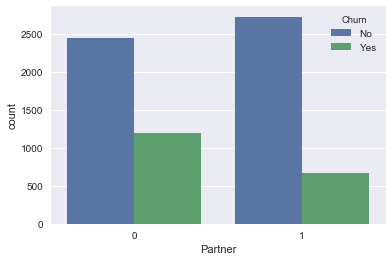

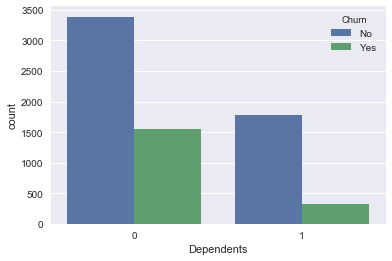

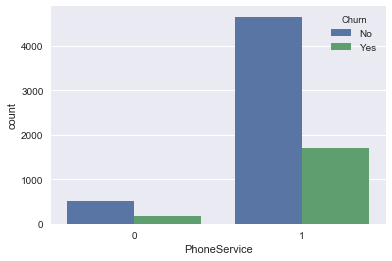

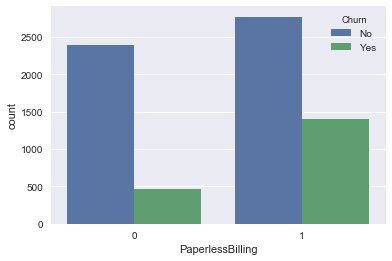

In [171]:
for feature in Yes_No_Columns:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that customers in the categories of without partners, without dependents, and who use paperless billing are more likely to leave. It'll be interesting to see if these categories end up in our final model.

Let's do the same for columns with multiple answers.

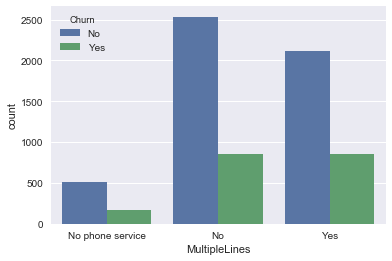

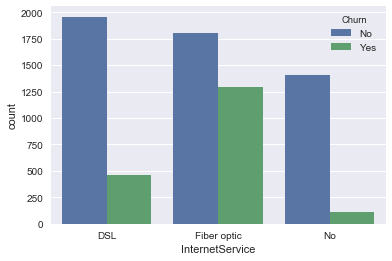

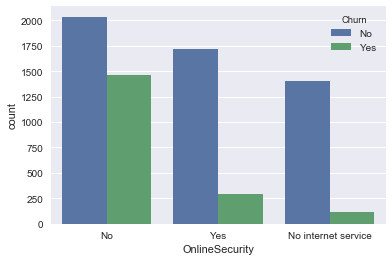

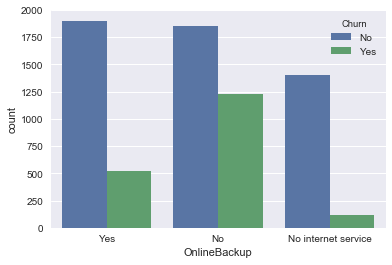

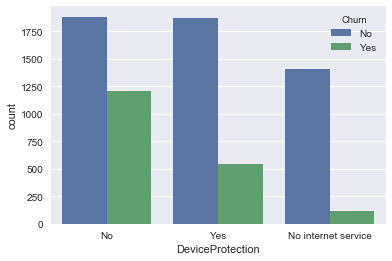

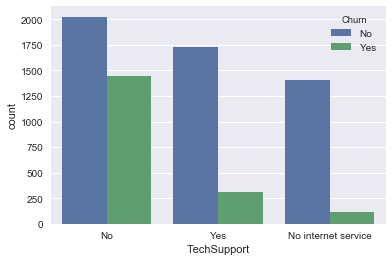

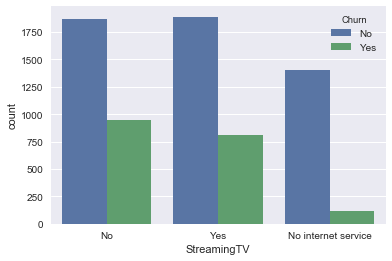

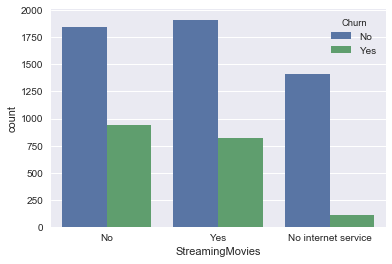

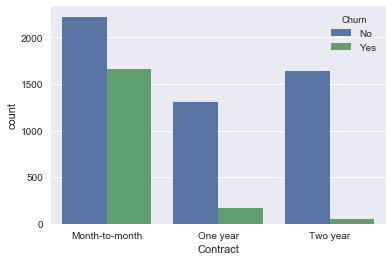

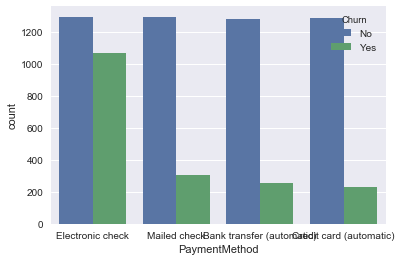

In [172]:
multiple_answers = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
for feature in multiple_answers:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that people with or without the following services are most likely to leave: Fiber Optic, No online security, No online backup, No device protection, No tech support, Month-to-month payment, and pay with Electronic Check. These categories are certainly ones to continue looking at as we go through the modeling.

In order for the computer to be able to use the features with multiple answers, let's convert them to dummies.

In [173]:
#Now convert Churn to 0s and 1s.
data['Churn'] = np.where(data['Churn'].values == 'Yes', 1, 0)
#Let's get dummies for the columns with multiple answers
data = pd.get_dummies(data, columns=multiple_answers)

In [174]:
#Now we can look at our 41 features.
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


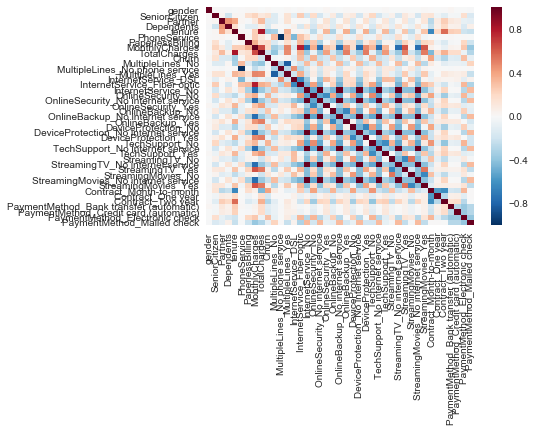

In [175]:
#Check their relationship with a heatmap
sns.heatmap(data.corr())

It appears there is little relationship between our variables outside of the inverse relationship with our dummy variables, which would make sense.

Let's create some models to see which features are most important for predicting churn.

## Build a Model

In [176]:
def basic_test(test):
    #Fit the models
    test.fit(X, y)
    #Generate the score
    print('Accuracy on the data with no feature selection: {}'.format(test.score(X, y)))
    print('\nCross Validation with 5 folds: {}'.format(cross_val_score(test, X, y, cv=5)) )

X = data.drop(['Churn'], 1)
y = data['Churn']

### Basic Models with No Manipulation
First let's try a number of models on the full data set without manipulation to see the accuracy of each model.

In [177]:
lr = LogisticRegression(C=9e9)
basic_test(lr)

Accuracy on the data with no feature selection: 0.8058873720136519

Cross Validation with 5 folds: [ 0.80312722  0.81165601  0.78962331  0.814367    0.80427046]


In [178]:
lr = LogisticRegression(C=1, penalty='l1')
basic_test(lr)
  

Accuracy on the data with no feature selection: 0.8063139931740614

Cross Validation with 5 folds: [ 0.80312722  0.81165601  0.79104478  0.80938834  0.80427046]


In [179]:
lr = LogisticRegression(C=1, penalty='l2')
basic_test(lr)

Accuracy on the data with no feature selection: 0.805745164960182

Cross Validation with 5 folds: [ 0.80312722  0.81236674  0.78962331  0.81507824  0.80498221]


In [180]:
neighbors = KNeighborsClassifier(n_neighbors=9)
basic_test(neighbors)

Accuracy on the data with no feature selection: 0.8114334470989761

Cross Validation with 5 folds: [ 0.77398721  0.78749112  0.77185501  0.77667141  0.78790036]


In [181]:
svc = SVC(C=1, gamma=0.1)
basic_test(svc)

Accuracy on the data with no feature selection: 0.9677189988623436

Cross Validation with 5 folds: [ 0.76190476  0.76972281  0.75479744  0.76386913  0.76654804]


In [182]:
clf = DecisionTreeClassifier(criterion='entropy')
basic_test(clf)

Accuracy on the data with no feature selection: 0.9974402730375427

Cross Validation with 5 folds: [ 0.71997157  0.74413646  0.73489694  0.71337127  0.7430605 ]


In [183]:
rfc = RandomForestClassifier()
basic_test(rfc)

Accuracy on the data with no feature selection: 0.9793799772468714

Cross Validation with 5 folds: [ 0.76830135  0.79104478  0.76830135  0.77809388  0.78932384]


In [184]:
clf = GradientBoostingClassifier()
basic_test(clf)

Accuracy on the data with no feature selection: 0.8257963594994312

Cross Validation with 5 folds: [ 0.8137882   0.81094527  0.78109453  0.81223329  0.80498221]


Our best models are scoring fairly well without any manipulation at around 80% accuracy. Let's try to isolate the important features of the 41 and improve our scores.

### Data Manipulation

First, let's look at he distributions of the continuous variables.

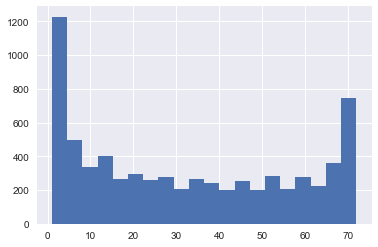

In [185]:
plt.hist(data['tenure'], bins=20)
plt.show()

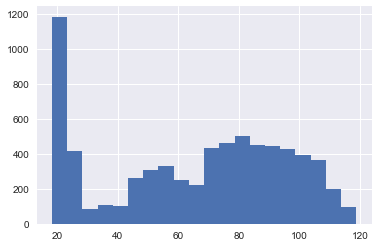

In [186]:
plt.hist(data['MonthlyCharges'], bins=20)
plt.show()

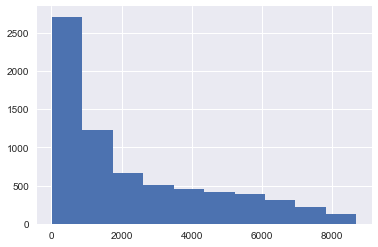

In [187]:
plt.hist(data['TotalCharges'], bins=10)
plt.show()

### Data Transformation
After running models with various non-linear transformations of the variables, normalizing the variables worked best with the models, so let's create normalized variables and replace the original variables with them.

In [188]:
data['tenure_norm'] = (data['tenure'] - min(data['tenure']))/ (max(data['tenure']) - min(data['tenure']))
data['MonthlyCharges_norm'] = (data['MonthlyCharges'] - min(data['MonthlyCharges']))/ (max(data['MonthlyCharges']) - min(data['MonthlyCharges']))
data['TotalCharges_norm'] = (data['TotalCharges'] - min(data['TotalCharges']))/ (max(data['TotalCharges']) - min(data['TotalCharges']))

In [189]:
model_data = data.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)

## Modeling

Now that we have some new features, let's balance our data to improve the performance of our modeling for predictions.

In [190]:
# Create a separate yes and no variable
yes_churn = model_data[model_data.Churn == 1]
no_churn = model_data[model_data.Churn == 0]

# Use resample to get an equal number of yes and nos in our data
model_data = resample(no_churn, n_samples=1869)
model_data = model_data.append(yes_churn)

# Now we can create our X and Y variables
X = model_data.drop(['Churn'], 1)
y = model_data['Churn']

#Make a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Selection

Principle Components Analysis works in a blackbox fashion, so it won't help us in isolating features important to predicting whether a customer will stay or leave, but let's include it to see if we can improve the performance of the models in predicting by cancelling out the noise of the 41 features.

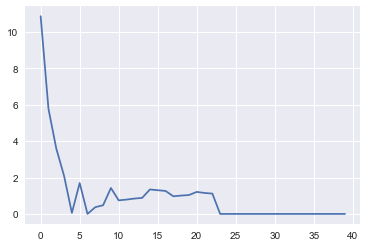

In [191]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(X_train)

# Transpose X to use with NumPy
Xt = X.T
Cx = np.cov(Xt)
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# Plot the eigenvalues
plt.plot(eig_val_cov)
plt.show()

Much of the variance is covered around the 3 or 4 mark, so let's create training data using PCA with 4 components.

In [192]:
#Set up our first X using PCA
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_train)
PCA_X = pd.DataFrame(X_std_pca)

#Now for the Test
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_test)
PCA_Xtest = pd.DataFrame(X_std_pca)

SK Learn has a powerful tool that allows us to use Cross Validation to isolate the features that are most important in prediction called Recursive Feature Elimination. In the below model, Logistic Regression with l1 penalty -- Lasso Regression -- will be used as the base model to run iterations and eliminate the features that don't provide much of the variance. The Cross Validation feature will help ensure the model is not overfitting and will provide a recommended set of features to use in modelling below.

In [193]:
start = datetime.now()
#Use Lasso/RFE with Cross Validation to get the best features for our second X
lr = LogisticRegression(C=1, penalty='l1')

#Set up our X,y
X = X_train
y = y_train

#Set up our Recursive Feature Elimination
rfe = RFECV(lr,cv=5) 
fit = rfe.fit(X,y)
result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),
                          columns=['Features','Ranking','Support'] ) 
print(result_RFE.sort_values('Ranking'))
print('It took the following time to complete this task:', datetime.now() - start)

                                   Features  Ranking  Support
0                                    gender        1     True
37                              tenure_norm        1     True
35           PaymentMethod_Electronic check        1     True
34    PaymentMethod_Credit card (automatic)        1     True
33  PaymentMethod_Bank transfer (automatic)        1     True
32                        Contract_Two year        1     True
30                  Contract_Month-to-month        1     True
29                      StreamingMovies_Yes        1     True
26                          StreamingTV_Yes        1     True
21                           TechSupport_No        1     True
20                     DeviceProtection_Yes        1     True
18                      DeviceProtection_No        1     True
15                          OnlineBackup_No        1     True
14                       OnlineSecurity_Yes        1     True
39                        TotalCharges_norm        1     True
12      

In [194]:
# Save the features to a list to use in our modeling
true_values = result_RFE[result_RFE.Support == True]
feature_list = []
for g in true_values['Features']:
    feature_list.append(g)

# Create our X for the training and test sets using the recommended features.
RFE_X = X_train[feature_list]
RFE_Xtest = X_test[feature_list]

Similiar to the above, it's possible to use Random Forest -- a bagging of decision trees based on subsamples of data -- to select features that best work for this model. The tool also will automatically generate each feature's importance with the higher the score, the more important the feature is in making accurate predictions.

In [195]:
# Let's use Random Forest to select features.
start = datetime.now()
X = X_train
y = y_train
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
feature_df = X.columns.get_values()
feat_labels = feature_df.tolist()

# Train the classifier
clf.fit(X, y)
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
for feature in zip(X, clf.feature_importances_):
    print(feature)

print('It took the following time to complete this task:', datetime.now() - start)

('gender', 0.025745962062965172)
('SeniorCitizen', 0.018265269850641648)
('Partner', 0.020879505582464441)
('Dependents', 0.017780429307045334)
('PhoneService', 0.0041648192791041575)
('PaperlessBilling', 0.024454852485974579)
('MultipleLines_No', 0.013660408489764235)
('MultipleLines_No phone service', 0.0040836680080775503)
('MultipleLines_Yes', 0.012915415578988277)
('InternetService_DSL', 0.013668119948671488)
('InternetService_Fiber optic', 0.032935418171477347)
('InternetService_No', 0.0044922601593260824)
('OnlineSecurity_No', 0.031339743891889288)
('OnlineSecurity_No internet service', 0.0043108371642981858)
('OnlineSecurity_Yes', 0.012726420555991883)
('OnlineBackup_No', 0.014321098926516141)
('OnlineBackup_No internet service', 0.0045961468339232887)
('OnlineBackup_Yes', 0.012378652255348104)
('DeviceProtection_No', 0.01548460174880012)
('DeviceProtection_No internet service', 0.0042593444629080192)
('DeviceProtection_Yes', 0.011806691049207396)
('TechSupport_No', 0.039717281

This is very insightful because we can use the "feature importances" to see just how important each feature is in predicting whether a customer will leave or not. Select From Model will isolate all of the variables that clear a given threshold of importance. We will then have our features generated through Principle Components Analysis, Logistic Regression through Recursive Feature Elimination with Cross Validation, and a serious of Decision Trees in a Random Forest to see if we can improve upon the results of modeling the data without any manipulation or selection.

In [196]:
start = datetime.now()

# Retrieve the most important features by using SelectFromModel with a given threshold 
sfm = SelectFromModel(clf, threshold=0.03)
rfcfeature_list =[]
# Train the selector
sfm.fit(X, y)
for feature_list_index in sfm.get_support(indices=True):
    rfcfeature_list.append(feat_labels[feature_list_index])
    print(feat_labels[feature_list_index])

RFC_X = X_train[rfcfeature_list]
RFC_Xtest = X_test[rfcfeature_list]
     
print('Number of features in this list: {}'.format(len(rfcfeature_list)))
print('It took the following time to complete this task:', datetime.now() - start)

InternetService_Fiber optic
OnlineSecurity_No
TechSupport_No
Contract_Month-to-month
Contract_Two year
tenure_norm
MonthlyCharges_norm
TotalCharges_norm
Number of features in this list: 8
It took the following time to complete this task: 0:00:02.644722


Of the binary categories that were of interest, Dependents and Paperless Billing were included in the RFE features while left out of the Random Forest selected features. However, Partner was left out of both of them meaning it didn't explain much of the variance.

Of the features with multiple responses, whether the customer had online security, tech support and their type of contract (specifically, those on month-to-month and two year contracts) were selected through the above feature selection methods for their importance. This confirms what the count plots above were showing while telling us that things that looked pretty obvious like Electronic Check paying customers and those without online backup were not as important as they were not selected by either RFE or Random Forest to be included in the models.

Let's see if these features perform as well or better than all of the features without engineering.

## Run Models

First let's create a dataframe to store the results.

In [197]:
#Make a list to store our results for a comparison at the end
results = pd.DataFrame(index=range(24))
results['Model'] = ['Logistic Regression',
                    'Logistic Regression',
                    'Logistic Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'KNN', 'KNN', 'KNN',
                    'SVC', 'SVC', 'SVC',
                    'Decision Tree', 'Decision Tree', 'Decision Tree',
                    'Random Forest',
                    'Random Forest',
                    'Random Forest',
                    'Gradient Booster',
                    'Gradient Booster',
                    'Gradient Booster',
                    ]
results['Feature Selection'] = ['PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                                'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest']


Train_Score = []
Test_Score = []
Cross_Validation = []
fold1 = []
fold2 = []
fold3 = []
fold4 = []
fold5 = []

### Testing Function

Now let's create a testing function so that all we have to do is set the test and its parameters to run the test and store the results.

In [198]:
#Create a testing function that will fit the test with PCA and our selected features from both RFECV and Random Forest
def testing_func(test):
    # This is a local list used to temporarily store scores
    scores=[]
    # This list serves the For loop below putting the variables in
    models = [[PCA_X, y], [PCA_Xtest, y_test], [RFE_X, y],[RFE_Xtest, y_test], [RFC_X, y], [RFC_Xtest, y_test]]
    for x in models:
        test.fit(x[0], x[1])
        scores.append(test.score(x[0], x[1]))
    
    #Let's store the results from our local list into the main list
    p=1
    for s in scores:
        p+=1
        if p % 2 == 0:
            Train_Score.append(s)
        else:
            Test_Score.append(s)

    # Create a local dataframe to display our results cleanly
    local_results_df=pd.DataFrame(scores, columns=['Accuracy'], index=['PCA Training', 'PCA Test', 'RFECV Training',
                                                                       'RFECV Test', 'Random Forest Training' , 
                                                                       'Random Forest Test'])
    print(local_results_df)
    
    #Create a list and put it through a For loop to do the Cross Validation
    exes = [[PCA_X, 'PCA'], [RFE_X, 'RFECV'], [RFC_X, 'Random Forest']]
    for x in exes:
        Cross_Validation0 = cross_val_score(test, x[0], y, cv=5)
        Cross_Validation.append(Cross_Validation0)
        
        #Divide up the results into 5 different folds for display
        fold1.append(Cross_Validation0[0])
        fold2.append(Cross_Validation0[1])
        fold3.append(Cross_Validation0[2])
        fold4.append(Cross_Validation0[3])
        fold5.append(Cross_Validation0[4])
        print('\nCross Validation Score with 5 folds with {}:\n{}'.format(x[1], Cross_Validation0))
    

From this point, we'll cycle through the models first setting the hyperparameters and then putting them through the function. There also is a timestamp on each one to gauge how much processing time is required for each model. The processing time isn't critical for this question, but could be critical in other situations. This study will be looking for accuracy over efficiency. However, with larger and larger data sets, efficiency could become an issue and it may be necessary to sacrifice accuracy to become more efficient in processing.

### Logistic Regression

This model will use Logistic Regression with 3 different hyperparameters. Logistic Regression is an effective way to work with classification problems like this one by calculating the probabilities of each result and taking a log of the results creating a situation where linear regression can be used where it would otherwise not be possible.

In [199]:
start = datetime.now()
#Let's compare our features in various models starting with Logistic Regression
# Set the C to a high number to minimize the impact of the penalty
lr = LogisticRegression(C=9e9)
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.750000
PCA Test                0.737439
RFECV Training          0.765974
RFECV Test              0.765802
Random Forest Training  0.753594
Random Forest Test      0.752026

Cross Validation Score with 5 folds with PCA:
[ 0.70916335  0.75896414  0.772       0.73        0.788     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.7250996   0.78884462  0.754       0.746       0.78      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.70717131  0.78486056  0.75        0.752       0.764     ]
It took the following time to complete this task: 0:00:00.300423


These results are weaker than the results achieved with the full data set without feature engineering which means that PCA is not fully covering the variance from the full data set and the isolated features, while achieving a majority, are not fully performing to the same level. Even though the accuracy has dropped off, there is value in isolating the important features for business use, which will be explained later.

### LASSO Regression

Now to try Lasso Regression which penalizes the regression model by adding the sum of the absolute values of the coefficients. The model will use iterations to pare features with little importance to the prediction and set their coefficients to zero based on the Lambda ("C") set. So first, let's see how Lambda interacts with the model by running the model with a range of Lambdas.

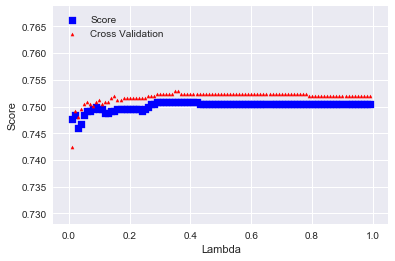

In [200]:
# Try to figure out the best Lambda for Lasso by running the test with the PCA X variable and mapping them out.
# Temporary lists to store the results
yl = []
cl = []

# For loop to run the model with different Lambdas represented as L
numb = np.arange(0.01, 1, 0.01)
for l in numb:
    lr = LogisticRegression(C=l, penalty='l1')
    lr.fit(PCA_X, y)
    yl.append(lr.score(PCA_X, y))
    cl.append(np.mean(cross_val_score(lr, PCA_X, y, cv=5)))

# Plot the results of the accuracy and Cross Validation Score
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yl, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cl, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

The score and mean of Cross Validation scores is very tight because the Lasso is effective in fitting a model without overfitting. With the PCA-derived features, the Cross Validation mean levels between 0.4 and 0.6 and then drops slightly, so the model below will use 0.6.

In [201]:
# The accuracy goes up along with the CV score and levels off around 0.6.
start = datetime.now()
lr = LogisticRegression(C=0.6, penalty='l1')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.750399
PCA Test                0.740681
RFECV Training          0.766374
RFECV Test              0.757699
Random Forest Training  0.755192
Random Forest Test      0.748784

Cross Validation Score with 5 folds with PCA:
[ 0.71115538  0.76095618  0.772       0.73        0.788     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.7250996   0.79681275  0.756       0.75        0.78      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.70717131  0.78286853  0.75        0.748       0.768     ]
It took the following time to complete this task: 0:00:00.217029


The scores are not an improvement on the scores from the model above without any data manipulation or feature selection though the performance is not that far off using fewer features to achieve similar results.

### Ridge Regression

Ridge Regression is similar to the LASSO Regression model above except instead of penalizing using the Absolute Values, it uses a much more aggressive penalty of the sum of the square of the coefficients multiplied by the regularization parameter, Lambda. The higher the Lambda, the more aggressive the penalty.

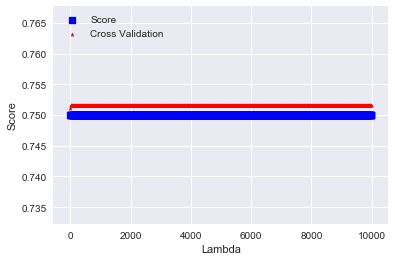

In [202]:
# Repeat the process for Ridge Regression
# Same kind of temporary list.
yr = []
cr = []
#Run the Lambdas as l through a high number like 10000 using the PCA_X
numb = np.arange(1, 10000, 10)
for l in numb:
    lr = LogisticRegression(C=l, penalty='l2')
    lr.fit(PCA_X, y)
    yr.append(lr.score(PCA_X, y))
    cr.append(np.mean(cross_val_score(lr, PCA_X, y, cv=5)))

# Plot the results.
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yr, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cr, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

The Cross Validation score drops after 1 and flatlines, so the model below will use 1 for Lambda.

In [203]:
#It's a flat line across the board, so we'll use 1.
start = datetime.now()
lr = LogisticRegression(C=1, penalty='l2')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.750000
PCA Test                0.737439
RFECV Training          0.765575
RFECV Test              0.766613
Random Forest Training  0.754792
Random Forest Test      0.747164

Cross Validation Score with 5 folds with PCA:
[ 0.70916335  0.75896414  0.77        0.73        0.788     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.7250996   0.78884462  0.756       0.744       0.778     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.70916335  0.78685259  0.75        0.75        0.766     ]
It took the following time to complete this task: 0:00:00.170394


Again, these results are not as high as the results generated using the data set without any feature engineering, but it performs nearly as well with fewer features making it potentially the model to use in a production package.

### K-Nearest Neighbor

This is a very simple model that makes predictions based on the closest observation(s). Lower numbers for K tend to overfit because the prediction line is following each occurence in a data set closely. First, let's look for the optimal number of Ks similar to how we examined Ridge and LASSO for Lambda above.

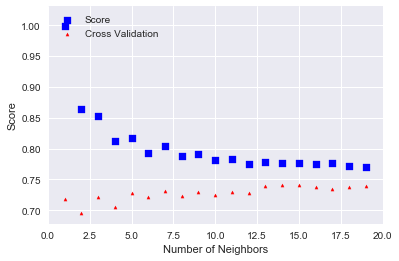

It took the following time to complete this task: 0:00:01.049205


In [204]:
# This runs the same kind of optimization analysis on KNN.
start = datetime.now()
# Temporary lists to store the results
yn = []
cv = []

# Run the model with number of neighbors as n again using the PCA_X.
numb = np.arange(1, 20, 1)
for n in numb:
    neighbors = KNeighborsClassifier(n_neighbors=n)
    neighbors.fit(PCA_X, y)
    yn.append(neighbors.score(PCA_X, y))
    cv.append(np.mean(cross_val_score(neighbors, PCA_X, y, cv=5)))

# Create a variable equal to the number of neighbors that created the highest CV
neighbor_number = cv.index(max(cv)) + 1

# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yn, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cv, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

print('It took the following time to complete this task:', datetime.now() - start)

In [205]:
# The accuracy steadily declines, but it is becoming less overfitted while the CV score remains steady. 
start = datetime.now()
neighbors = KNeighborsClassifier(n_neighbors=neighbor_number)
testing_func(neighbors)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.776757
PCA Test                0.769854
RFECV Training          0.775160
RFECV Test              0.756078
Random Forest Training  0.778355
Random Forest Test      0.779579

Cross Validation Score with 5 folds with PCA:
[ 0.73306773  0.75298805  0.742       0.73        0.75      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.70916335  0.75498008  0.74        0.724       0.764     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7310757   0.75697211  0.758       0.744       0.762     ]
It took the following time to complete this task: 0:00:00.899345


### Support Vector Machines

SVM uses a multi-dimensional hyperplane to classify based on the regularization parameter ("C") and Gamma. A lower C will look for a larger marigin hyperplane even if it misclassifies points leading to less overfitting, but potentially lower overall accuracy. Gamma looks at each individual training set point and which ones are considered. A higher gamma means that only close points will be considered while a low gamma means points far away will be considered when determining the hyperplane.

Luckily, Grid Search CV exists to assist in the optimization of "C" and gamma.

In [206]:
# SKlearn has a tool that will optimize SVC
start = datetime.now()
svc = SVC()
# Set the hyperparameters
parameters = {'C':[1,2,3,4,5], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10]}
# Run it through the tool.
grid = GridSearchCV(svc, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'C': 5, 'gamma': 0.1} with a score of %0.7671725239616614
It took the following time to complete this task: 0:00:17.504406


In [207]:
# Utilizing the results from above, we can run SVC aimed at the highest CV score.
start = datetime.now()
svc = SVC(C=parameters['C'], gamma=parameters['gamma'])
testing_func(svc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.748403
PCA Test                0.746353
RFECV Training          0.817891
RFECV Test              0.837925
Random Forest Training  0.755192
Random Forest Test      0.752026

Cross Validation Score with 5 folds with PCA:
[ 0.71115538  0.75896414  0.752       0.728       0.784     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.73306773  0.76095618  0.772       0.748       0.778     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.72111554  0.79083665  0.754       0.736       0.772     ]
It took the following time to complete this task: 0:00:02.871638


The optimized hyperparameters do a good job of preventing overfitting, but overall, the model underperforms. Perhaps, if the data set and training set were larger, it would perform better.

### Decision Trees

Decision Trees divide the data set into smaller data sets based on features until the data set is small enough to fall under one label (i.e.Churn: yes or no). The features become nodes with the outcome as leaves. The decision of how to split is made by the amount of information gained or entropy reduced. A tree with too much depth can create overfitting, so it is important to optimize the depth of the tree.

In [208]:
# Run the same optimization tool on Decision Tree.

start = datetime.now()
clf = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(clf, parameters).fit(PCA_X, y)
predicted = grid.predict(PCA_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 4} with a score of %0.740814696485623
It took the following time to complete this task: 0:00:00.263278


In [209]:
# Run the selected hyperparameters from above.
start = datetime.now()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=parameters['max_depth'])
testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.757987
PCA Test                0.752026
RFECV Training          0.761981
RFECV Test              0.758509
Random Forest Training  0.761981
Random Forest Test      0.754457

Cross Validation Score with 5 folds with PCA:
[ 0.69521912  0.72709163  0.754       0.718       0.77      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.73505976  0.75498008  0.738       0.756       0.764     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.72310757  0.75298805  0.738       0.744       0.764     ]
It took the following time to complete this task: 0:00:00.160049


The optimization took care of the issue of overfitting, but the overall model performs not as well as the model without feature engineering. The next two models will utilize a series of Decision Trees to see if a stronger model can be made through the combination of weaker models.

### Random Forest

As explained above, Random Forest takes multiple subsamples (ensembles) of the data set that are equally likely to appear in the sample and run independent decision trees on them. It then bags them together and uses some sort of weighting method to combine them.

Let's utilize Grid Search CV to tune the hyperparameters. Since we have already used Random Forest to generate feature importance, let's use them below to tune the model.

In [210]:
#Run the same optimization tool for Random Forest.

start = datetime.now()
rfc = RandomForestClassifier()
parameters = {'n_estimators':[10, 100, 1000, 5000], 'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(rfc, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 8, 'n_estimators': 100} with a score of %0.777555910543131
It took the following time to complete this task: 0:03:01.316303


In [211]:
# Run Random Forest using the parameters selected above.
start = datetime.now()
rfc = RandomForestClassifier(n_estimators=parameters['n_estimators'], 
                             max_depth=parameters['max_depth'], 
                             min_samples_leaf=1, 
                             max_leaf_nodes=4)

testing_func(rfc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.750799
PCA Test                0.741491
RFECV Training          0.758387
RFECV Test              0.759319
Random Forest Training  0.756789
Random Forest Test      0.757699

Cross Validation Score with 5 folds with PCA:
[ 0.687251    0.74302789  0.756       0.728       0.76      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.72111554  0.79083665  0.752       0.75        0.786     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.72310757  0.79282869  0.748       0.748       0.772     ]
It took the following time to complete this task: 0:00:03.747945


### Gradient Boosting

This last method is similar to Random Forest in that it uses an ensemble of sub-samples to find the best prediction model. However, instead of taking an assortment of independent sub-samples and combining the predictors to come up with a stronger model, Gradient Boosting creates predictors sequentially learning from the predictor before it. Since it learns from mistakes made before it, it typically takes fewer iterations to come up with a stronger model. If the process is allowed to iterate too much, it will overfit the model and not perform well on the test data set.

In [212]:
# Run the same optimization tool for gradient boosting
start = datetime.now()
clf = GradientBoostingClassifier()
parameters = {'n_estimators':[1, 10, 20, 50], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
              'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(clf, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 20} with a score of %0.7667731629392971
It took the following time to complete this task: 0:00:45.029435


Only 10 estimators compared to the 1000 than Grid Search found was optimal for Random Forest.

In [213]:
# Run Gradient Boosting using the above.
start = datetime.now()
clf = GradientBoostingClassifier(loss='exponential', learning_rate=parameters['learning_rate'], 
                                 n_estimators=parameters['n_estimators'], subsample=0.75, 
                                 max_depth=parameters['max_depth'])

testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.762380
PCA Test                0.764992
RFECV Training          0.773163
RFECV Test              0.774716
Random Forest Training  0.771965
Random Forest Test      0.782820

Cross Validation Score with 5 folds with PCA:
[ 0.71713147  0.74302789  0.752       0.722       0.77      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.74103586  0.79681275  0.762       0.76        0.776     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.73505976  0.76693227  0.762       0.758       0.758     ]
It took the following time to complete this task: 0:00:00.573277


This model performed the best and took vastly less time to find the strongest model than Random Forest.

## Results

In [214]:
# Display our results cleanly
results2 = pd.DataFrame({'Train Score': Train_Score, 'Test Score': Test_Score, 'CV Fold 1': fold1,
                            'CV Fold 2': fold2, 'CV Fold 3': fold3, 'CV Fold 4': fold4, 'CV Fold 5': fold5})
results2['CV Mean'] = (results2['CV Fold 1'] + results2['CV Fold 2'] + results2['CV Fold 3'] + 
                       results2['CV Fold 4'] + results2['CV Fold 5']) / 5
results = pd.concat([results, results2], axis=1)

results.head(24)

,Model,Feature Selection,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5,Test Score,Train Score,CV Mean
0,Logistic Regression,PCA,0.709163,0.758964,0.772,0.730,0.788,0.737439,0.750000,0.751625
1,Logistic Regression,RFECV,0.725100,0.788845,0.754,0.746,0.780,0.765802,0.765974,0.758789
2,Logistic Regression,Random Forest,0.707171,0.784861,0.750,0.752,0.764,0.752026,0.753594,0.751606
3,Lasso Regression,PCA,0.711155,0.760956,0.772,0.730,0.788,0.740681,0.750399,0.752422
4,Lasso Regression,RFECV,0.725100,0.796813,0.756,0.750,0.780,0.757699,0.766374,0.761582
5,Lasso Regression,Random Forest,0.707171,0.782869,0.750,0.748,0.768,0.748784,0.755192,0.751208
6,Ridge Regression,PCA,0.709163,0.758964,0.770,0.730,0.788,0.737439,0.750000,0.751225
7,Ridge Regression,RFECV,0.725100,0.788845,0.756,0.744,0.778,0.766613,0.765575,0.758389
8,Ridge Regression,Random Forest,0.709163,0.786853,0.750,0.750,0.766,0.747164,0.754792,0.752403
9,KNN,PCA,0.733068,0.752988,0.742,0.730,0.750,0.769854,0.776757,0.741611


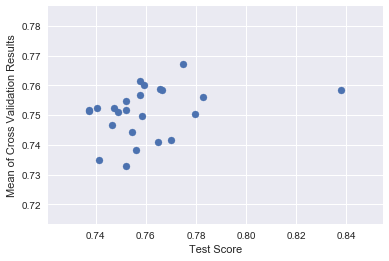

In [215]:
# Plot them. Our goal is the get as many points in the upper right hand corner as possible.
x = results['Test Score']
y = results['CV Mean']
plt.xlabel('Test Score')
plt.ylabel('Mean of Cross Validation Results')
plt.scatter(x, y)
plt.show()

The best performer of the models was the Gradient Boosting Classifier using features generated by Recursive Feature Elimination, which scored roughly the same as running the model with no feature engineering. Gradient Boosting with features generated by Random Forest (feature importance) scored very close to the features selected by RFECV. This is important to the goal of isolating important factors in determining whether a customer stays or goes because unlike PCA and many of the unsupervised learning methods, we can see inside the box and know why the computer is making its prediction. This means that action items can be drawn from the results. While an accuracy of 80% is not the strongest predictors, it is still accurate enough to give a company some confidence in choosing where to put its marketing dollars since marketing budgets don't need the accuracy of brain surgeons performing life-saving procedures.

For this data set, since the amount of data is not that large, it would be fine to use Gradient Boosting since both the optimization process and running the model with the optimal hyperparameters did not take too much time. However, should the data set in production be much larger, it would be better to use something like Ridge Regression which produced fairly similar results taking only a fraction of the time. 

## Recommendations
From the above results, one could recommend putting an extra effort in getting customers without features such as online or tech support to sign up for these features. Those who are subscribed to those features, it appears, tend to stay with the company longer than those who don't. Also, it would be adviseable to the company to try to get those who pay with electronic check (not an automatic payment) to switch to an automatic payment type such as auto-withdrawal or a credit card on file. It is pretty logical that a person who signs up for autopayment and forgets about the payment each month until he or she sees it on a bank statement will be less likely to quit the service than someone who has to remember to send an electronic check every month to make the payment. The above model corroborates this hypothesis.

## Considerations for Improvement
First and foremost, this is only 6,000 lines of data and it's not quite clear how this data was derived from the larger population. Having the whole data set would provide more instances for the training/testing set and give the model more confidence with the larger sample size.

Second, it would be helpful to have even partial data regarding the reasons given for canceling the service. When someone cancels their telecom service, that person needs to speak to a customer rep to do so. When the customer rep takes such a call, the customer rep asks why the person is quitting (this also gives the company a chance to negotiate with the customer to retain the customer through lower rates or other incentives). It could be that people who are on month-to-month contracts are temporarily living in an apartment on a work or assignment or after separating from a spouse and so the person quitting the service could not be retained no matter what advertisements or marketing campaign the company invested in. Adding this field would give color to the data and make more insightful recommendations.

## From Here
This data set is just one example of how data science can be used to guide business decisions based on consumer behavior. While this data set was in telecoms, the same methodology could be used in other sectors to gain insights on which customers were most likely to leave in order to provide some guidance to those sales representatives. Much is said about how machine learning will replace people, and while that may be the case in the future, at the moment it can provide powerful insights to improve the performance of people and studies like these should be done using data sets from different industries to achieve that performance boost.

In [216]:
print('It took the following time to complete this notebook:', datetime.now() - main_start)

It took the following time to complete this notebook: 0:05:15.210209
